In [11]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import time

In [12]:
def is_independent_set(graph, subset):
    for u in subset:
        for v in subset:
            if u != v and graph.has_edge(u, v):
                return False
    return True

In [13]:
def is_dominating_set(graph, subset):
    dominating_nodes = set(subset)
    for node in subset:
        dominating_nodes.update(graph.neighbors(node))
    return len(dominating_nodes) == len(graph.nodes)

In [14]:
def fitness(solution, graph):
    if is_independent_set(graph, solution) and is_dominating_set(graph, solution):
        return 1 / len(solution)
    return float('-inf')

In [15]:
def aco_minimum_independent_dominating_set(graph, num_ants, num_iterations, alpha, beta, evaporation_rate):
    node_list = list(graph.nodes())  
    num_nodes = len(node_list)
    pheromone_matrix = np.ones(num_nodes)  
    best_solution = None
    best_fitness = float('-inf')

    for iteration in range(num_iterations):
        solutions = []

        for _ in range(num_ants):
            solution = set()
            available_nodes = set(node_list)
            
            while available_nodes:  
                
                probabilities = np.array([pheromone_matrix[node_list.index(node)] for node in available_nodes])
                probabilities /= probabilities.sum()  
                
                selected_node = np.random.choice(list(available_nodes), p=probabilities)
                solution.add(selected_node)
                available_nodes.remove(selected_node)  
                
               
                if not is_independent_set(graph, solution):  
                    solution.remove(selected_node)  
                    break
            
            fitness_value = fitness(solution, graph)
            solutions.append((solution, fitness_value))


            if fitness_value > best_fitness:  
                best_fitness = fitness_value
                best_solution = solution


        pheromone_matrix *= (1 - evaporation_rate) 
        for solution, fitness_value in solutions:
            if fitness_value > 0:
                for node in solution:
                    pheromone_matrix[node_list.index(node)] += (1 / fitness_value)

    return best_solution, best_fitness


In [16]:
def draw_graph(graph, min_set):
    pos = nx.spring_layout(graph)  
    plt.figure(figsize=(8, 6)) 
    
    nx.draw_networkx_edges(graph, pos, edge_color='gray', alpha=0.5)
    
    node_color = 'lightblue'
    node_color = ['red' if node in min_set else 'lightblue' for node in graph.nodes()]
    
    nx.draw_networkx_nodes(graph, pos, node_color=node_color, node_size=500)
    
    nx.draw_networkx_labels(graph, pos)
    
    plt.title("Graf sa Minimalnim Nezavisnim Dominirajućim Skupom")
    plt.show()

Minimum Independent Dominating Set: {'22', '35', '3', '28', '13'}
Fitness (1 / length of the set): 0.2


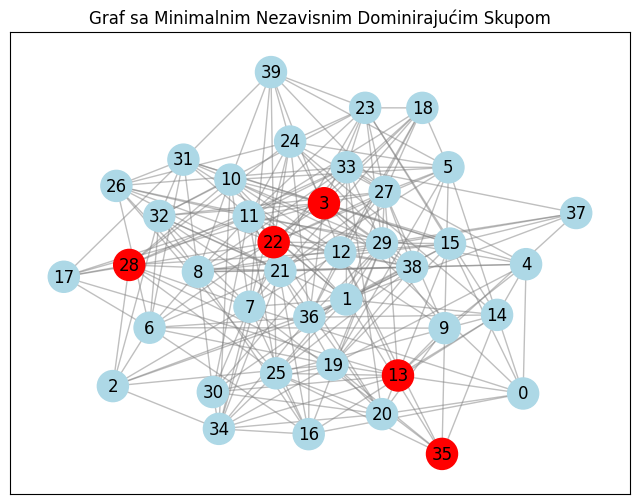

In [76]:
graph = nx.read_gml("tests/test_40_0.3.in")

best_set, best_value = aco_minimum_independent_dominating_set(graph, num_ants=10, num_iterations=1000, alpha=1, beta=1, evaporation_rate=0.1)
print("Minimum Independent Dominating Set:", best_set)
print("Fitness (1 / length of the set):", best_value)

draw_graph(graph, best_set)

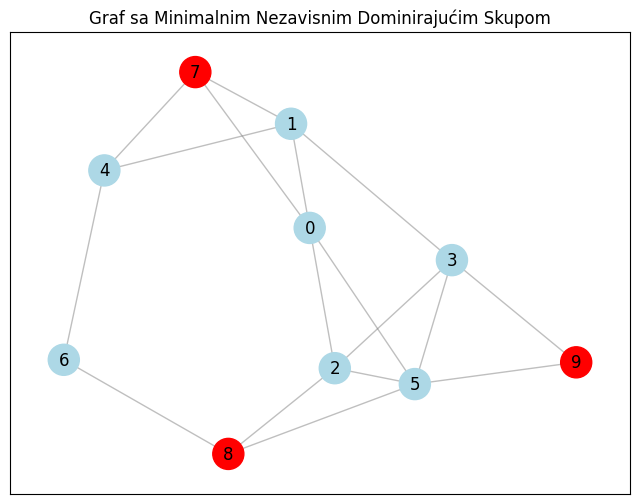

Processed graph test_10_0.3.in and saved results.


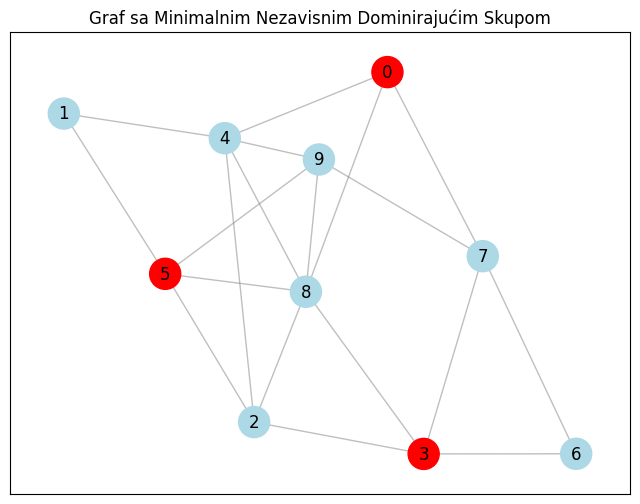

Processed graph test_10_0.5.in and saved results.


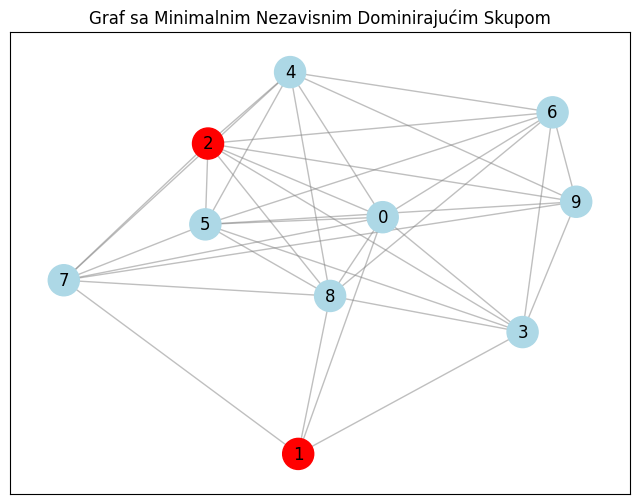

Processed graph test_10_0.7.in and saved results.


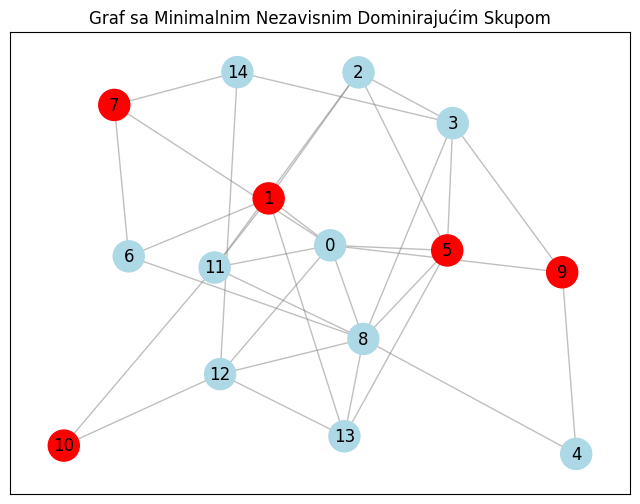

Processed graph test_15_0.3.in and saved results.


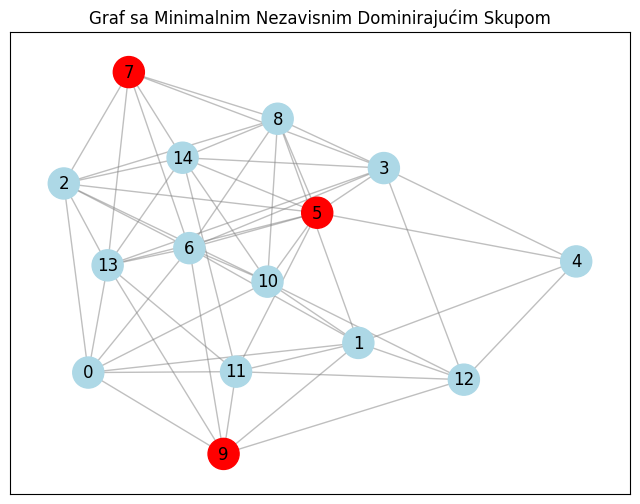

Processed graph test_15_0.5.in and saved results.


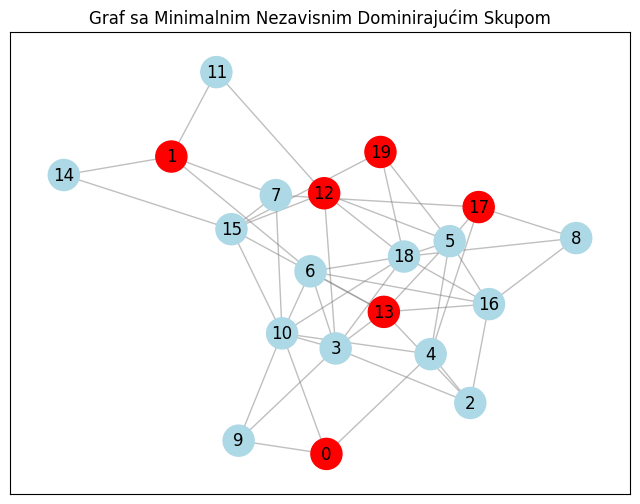

Processed graph test_20_0.3.in and saved results.


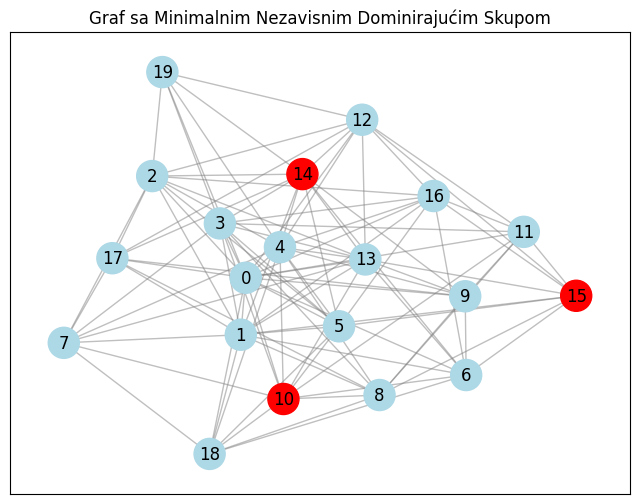

Processed graph test_20_0.5.in and saved results.


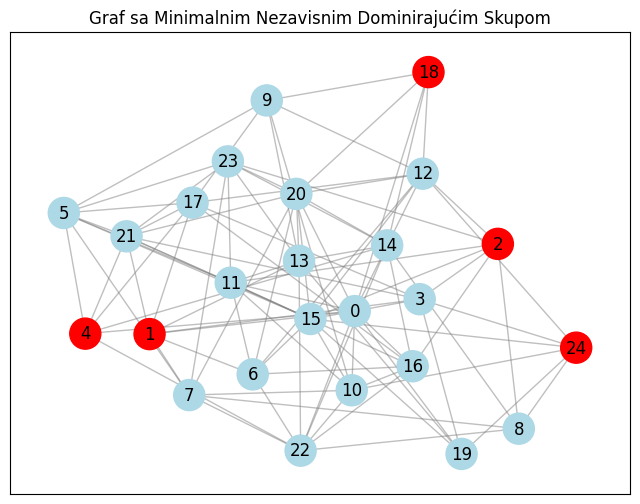

Processed graph test_25_0.3.in and saved results.


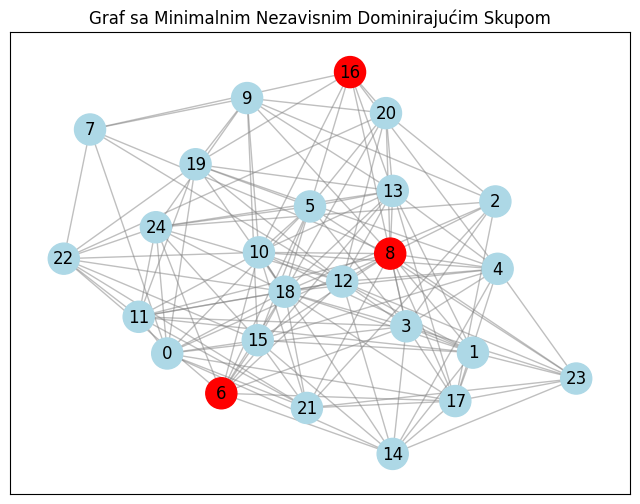

Processed graph test_25_0.5.in and saved results.


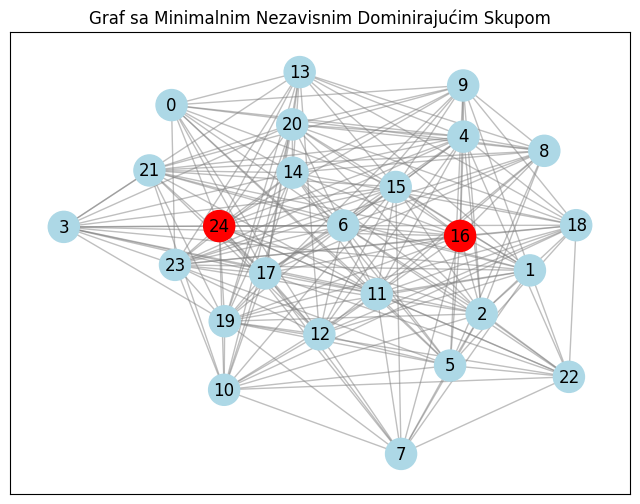

Processed graph test_25_0.7.in and saved results.


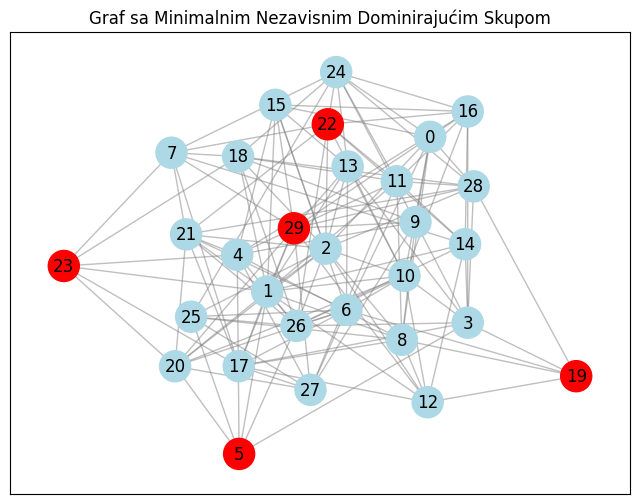

Processed graph test_30_0.3.in and saved results.


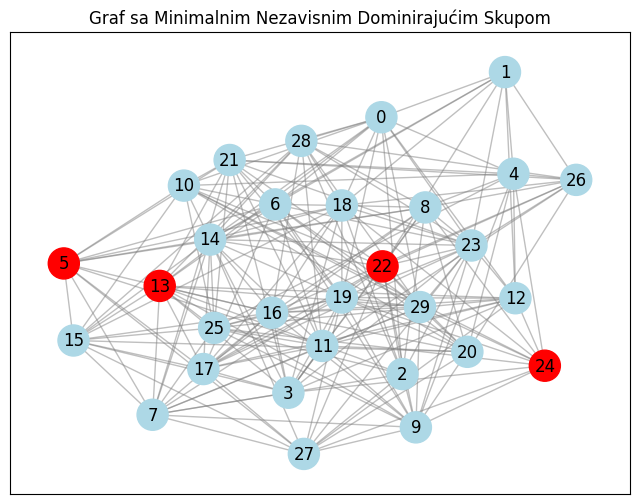

Processed graph test_30_0.5.in and saved results.


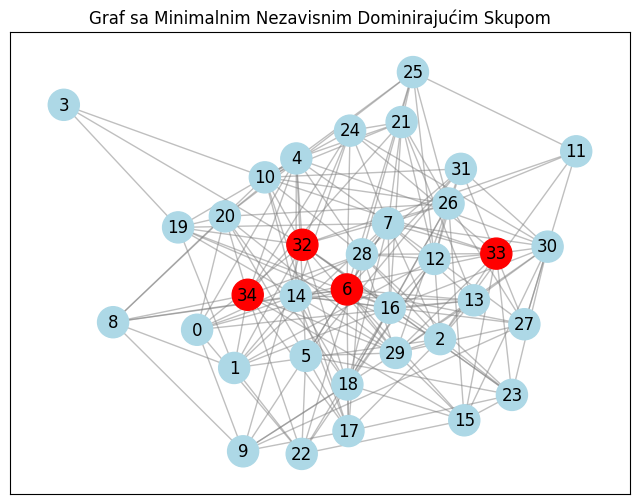

Processed graph test_35_0.3.in and saved results.


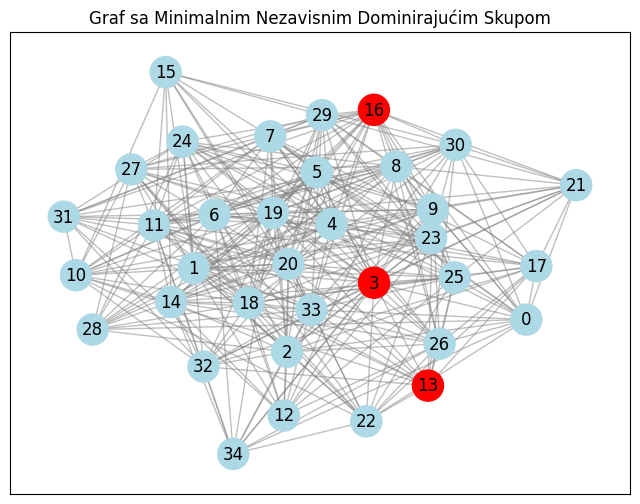

Processed graph test_35_0.5.in and saved results.


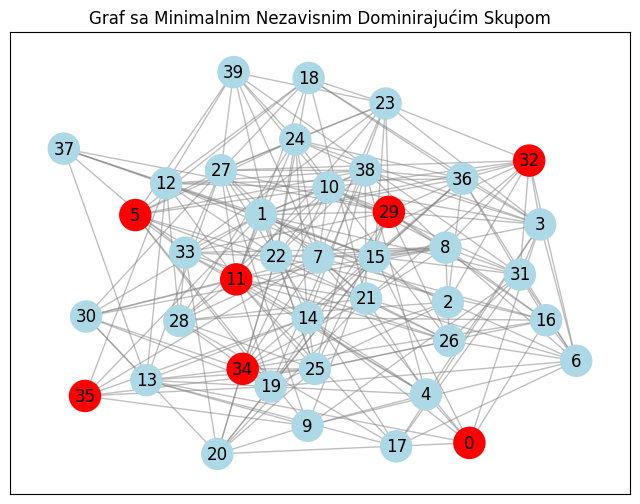

Processed graph test_40_0.3.in and saved results.


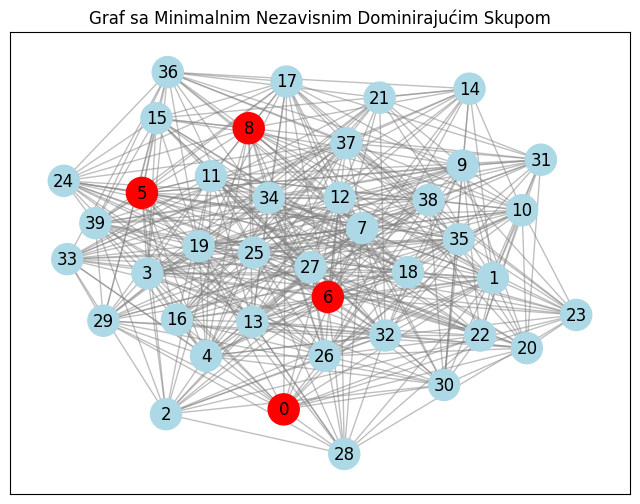

Processed graph test_40_0.5.in and saved results.


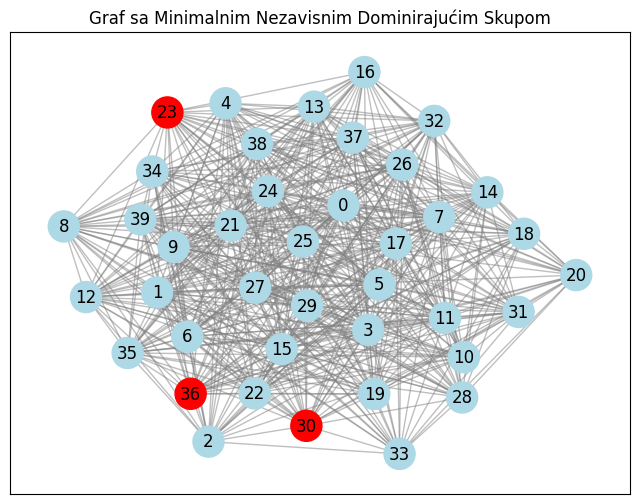

Processed graph test_40_0.7.in and saved results.


In [19]:
def run_aco_on_tests(directory="tests/", results_dir="results/", output_file="acoResults.txt"):
    if not os.path.exists(results_dir):
        os.makedirs(results_dir)

    output_path = os.path.join(results_dir, output_file)
    
    with open(output_path, 'w') as f_out:
        for filename in os.listdir(directory):
            if filename.endswith(".in"):
                graph_path = os.path.join(directory, filename)
                
                graph = nx.read_gml(graph_path)
                
                start_time = time.time()
                
                best_set, best_value = aco_minimum_independent_dominating_set(
                    graph, num_ants=10, num_iterations=1000, alpha=1, beta=1, evaporation_rate=0.1)
                
                elapsed_time = time.time() - start_time
                
                num_nodes_in_set = len(best_set)
                num_iterations = 1000  
                result_message = "Minimum independent dominating set found." if best_value != float('-inf') else "No valid solution found."
                
                f_out.write(f"Test Name: {filename}\n")
                f_out.write(f"Result: {result_message}\n")
                f_out.write(f"Number of nodes: {num_nodes_in_set}\n")
                f_out.write(f"Number of iterations: {num_iterations}\n")
                f_out.write(f"Time taken (seconds): {elapsed_time}\n")
                f_out.write("\n")  

                draw_graph(graph, best_set)

                print(f"Processed graph {filename} and saved results.")


run_aco_on_tests(directory="tests/", results_dir="results/", output_file="acoResults.txt")
